# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [990]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [991]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [992]:
data = pd.read_csv('cost_revenue_dirty.csv')


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [993]:
data.shape

(5391, 6)

In [994]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [995]:
colums_to_convet = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for column in colums_to_convet:
    data[column] = data[column].str.replace('$','')
    data[column] = data[column].str.replace(',','')
print(data[["USD_Production_Budget"]])

     USD_Production_Budget
0                   110000
1                   385907
2                   200000
3                   100000
4                   245000
...                    ...
5386              15000000
5387             160000000
5388             175000000
5389              50000000
5390              20000000

[5391 rows x 1 columns]


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [996]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.Release_Date

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [997]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(float)
average_production_budget = data['USD_Production_Budget'].mean()
print(round(average_production_budget,2))

31113737.58


In [998]:
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(float)
average_production_budget = data['USD_Worldwide_Gross'].mean()
print(round(average_production_budget,2))

88855421.96


In [999]:
min_domest = data.USD_Domestic_Gross.min
min_world = data.USD_Worldwide_Gross.min
print(f"Min domestic {min_domest} and min worldwide {min_world}")

Min domestic <bound method NDFrame._add_numeric_operations.<locals>.min of 0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: object> and min worldwide <bound method NDFrame._add_numeric_operations.<locals>.min of 0      11,000,000.00
1               0.00
2       8,000,000.00
3       3,000,000.00
4      22,000,000.00
            ...     
5386            0.00
5387            0.00
5388            0.00
5389            0.00
5390            0.00
Name: USD_Worldwide_Gross, Length: 5391, dtype: float64>


In [1000]:
data["Profitability"] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']

data_sorted = data.sort_values(by="Profitability",ascending=True)
bottom_25_percentile = data['Profitability'].quantile(0.25)
print(data_sorted.tail())
# bottom_25_percentile_films = data[data['Profitability'] <= bottom_25_percentile]
# if bottom_25_percentile_films['Profitability'].mean() >= 0:
#     print("The bottom 25% of films are profitable.")
# else:
#     print("The bottom 25% of films lose money.")  

      Rank Release_Date                           Movie_Title  \
4844    59   2015-03-04                             Furious 7   
5077    28   2015-12-06                        Jurassic World   
5079     2   2015-12-18  Star Wars Ep. VII: The Force Awakens   
1034    37   1997-12-19                               Titanic   
3529     1   2009-12-18                                Avatar   

      USD_Production_Budget  USD_Worldwide_Gross USD_Domestic_Gross  \
4844         190,000,000.00     1,516,748,684.00          351032910   
5077         215,000,000.00     1,671,640,593.00          652198010   
5079         306,000,000.00     2,058,662,225.00          936662225   
1034         200,000,000.00     2,207,615,668.00          658672302   
3529         425,000,000.00     2,783,918,982.00          760507625   

        Profitability  
4844 1,326,748,684.00  
5077 1,456,640,593.00  
5079 1,752,662,225.00  
1034 2,007,615,668.00  
3529 2,358,918,982.00  


In [1001]:
data_sorted = data.sort_values(by="Rank",ascending=True)

print(data_sorted.head())

      Rank Release_Date                               Movie_Title  \
3529     1   2009-12-18                                    Avatar   
5079     2   2015-12-18      Star Wars Ep. VII: The Force Awakens   
2911     3   2007-05-24  Pirates of the Caribbean: At World’s End   
4925     4   2015-06-11                                   Spectre   
4196     5   2012-07-20                     The Dark Knight Rises   

      USD_Production_Budget  USD_Worldwide_Gross USD_Domestic_Gross  \
3529         425,000,000.00     2,783,918,982.00          760507625   
5079         306,000,000.00     2,058,662,225.00          936662225   
2911         300,000,000.00       963,420,425.00          309420425   
4925         300,000,000.00       879,620,923.00          200074175   
4196         275,000,000.00     1,084,439,099.00          448139099   

        Profitability  
3529 2,358,918,982.00  
5079 1,752,662,225.00  
2911   663,420,425.00  
4925   579,620,923.00  
4196   809,439,099.00  


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [1002]:
films_lol =  data[column] = data[column].str.replace('$','').str.replace(',','').astype(float)
films_lol = data[data["USD_Domestic_Gross"] == 0]
print(len(films_lol))
highest_lol_films = films_lol.sort_values(by="USD_Production_Budget",ascending=False)
print(highest_lol_films)

512
      Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
5388         175,000,000.00                 0.00                0.00   
5387         160,000,000.00                 0.00                0.00   
5384         103,000,00

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

### Filtering on Multiple Conditions

In [1003]:
mult_cond_test = data.loc[(data["USD_Domestic_Gross"] == 0) & (data.USD_Worldwide_Gross != 0)]
print(mult_cond_test)

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel           3,380,000.00   
1579  5087   2001-02-11  Everything Put Together             500,000.00   
1744  3695   2001-12-31                 The Hole           7,500,000.00   
2155  4236   2003-12-31                  Nothing           4,000,000.00   
2203  2513   2004-03-31                The Touch          20,000,000.00   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert          36,000,000.00   
5348  2225   2017-05-05        Chāi dàn zhuānjiā          23,000,000.00   
5360  4832   2017-07-03                Departure           1,100,000.00   
5372  1856   2017-08-25                Ballerina          30,000,000.00   
5374  4237   2017-08-25     Polina danser sa vie           4,000,000.00   

      USD_Worldwide_Gross  USD_Domestic_Gross  Profitability  
71               3,220.00           

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [1004]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
no_data_films = data.loc[(data.Release_Date > scrape_date) & (data.USD_Domestic_Gross == 0)]
print(no_data_films)
print(len(no_data_films))

      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
5384         103,000,000.00                 0.00                0.00   
5385         100,000,000.00                 0.00                0.00   
5386          15,000,000.00                 0.00                0.00   
5387         160,000,000.00                 0.00                0.00   
5388         175,000,000.00                 0.00                0.00   
5389          50,000,000.00                 0.00                0.00   
5390          20,000,00

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [1005]:
money_losing = data.loc[data.USD_Production_Budget > data.USD_Worldwide_Gross]
print(len(money_losing)/len(data))
print(money_losing)

0.373585605639028
      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
15    4738   1936-05-02                      Modern Times   
17    4814   1936-10-20  Charge of the Light Brigade, The   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
1                385,907.00                 0.00                0.00   
6              2,000,000.00                 0.00                0.00   
8              4,000,000.00      

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

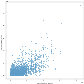

In [1006]:
import seaborn as sns

plt.figure(figsize=(10,10),dpi=10)
sns.scatterplot(data=data,
                x= "USD_Production_Budget",
                y="USD_Worldwide_Gross")

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [1007]:
data['Release_Year'] = data['Release_Date'].dt.year
print(data)

      Rank Release_Date                     Movie_Title  \
0     5293   1915-08-02           The Birth of a Nation   
1     5140   1916-05-09                     Intolerance   
2     5230   1916-12-24    20,000 Leagues Under the Sea   
3     5299   1920-09-17  Over the Hill to the Poorhouse   
4     5222   1925-01-01                  The Big Parade   
...    ...          ...                             ...   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
0                110,000.00        11,000,000.00       10,000,000.00   
1                385,907.00                 0.00                0.00   
2                200,000.00         8,000,000.00        8,000,000.00   
3  

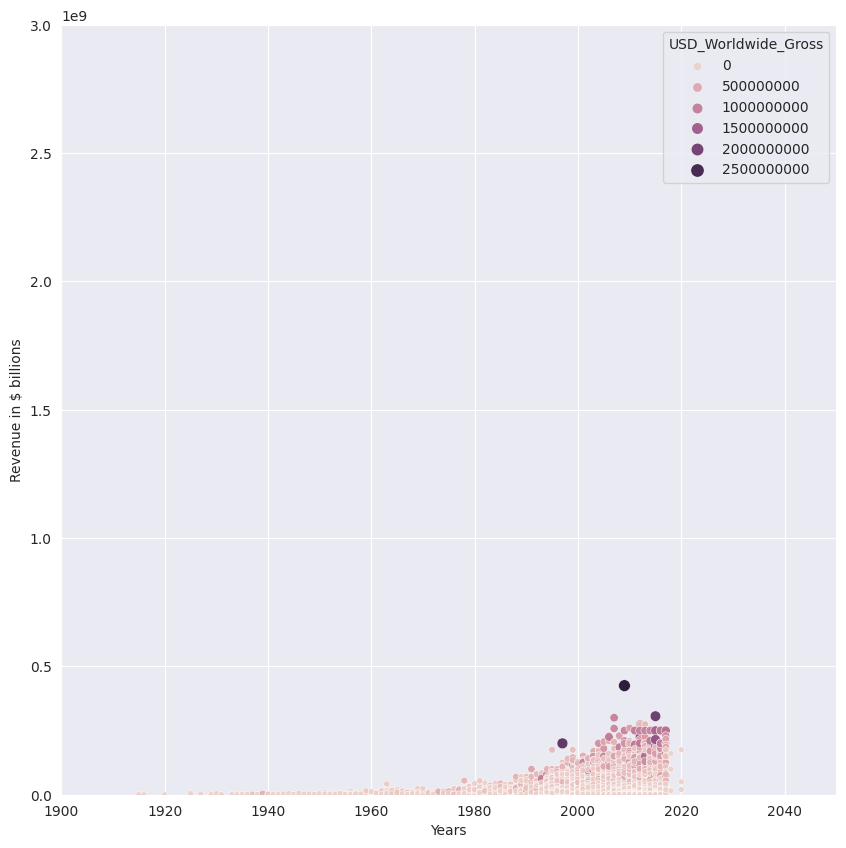

In [1008]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10, 10), dpi=100)
    ax = sns.scatterplot(data=data,
                        x="Release_Year",
                        y="USD_Production_Budget",
                        hue="USD_Worldwide_Gross",
                        size="USD_Worldwide_Gross")
    ax.set(ylim=(0, 3000000000),
           xlim=(1900, 2050),
           ylabel='Revenue in $ billions',
           xlabel='Years')

# Show the plot
plt.show()

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

# Seaborn Regression Plots

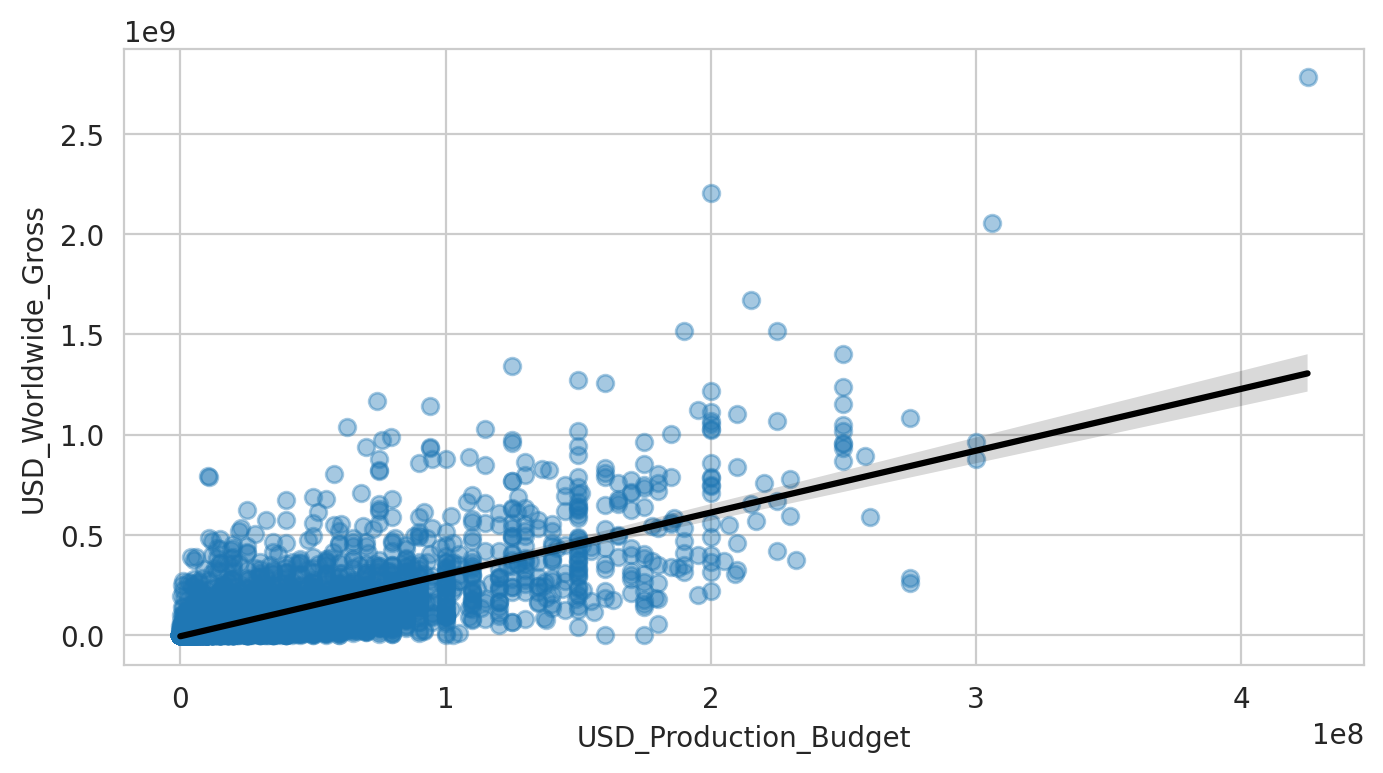

In [1009]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 